In [32]:
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [33]:
from tensorflow.keras.utils import image_dataset_from_directory  # For dataset loading
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

In [ ]:
# Define your base path and parameters
base_path = r'C:\Users\hitesh\Desktop\project exe-2\archive\real_vs_fake\real-vs-fake'
batch_size = 64
img_size = (224, 224)

# Load the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=os.path.join(base_path, 'train'),
    label_mode='binary',
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True
)

# Load the validation dataset
valid_ds = tf.keras.utils.image_dataset_from_directory(
    directory=os.path.join(base_path, 'valid'),
    label_mode='binary',
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True
)

# Load the test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=os.path.join(base_path, 'test'),
    label_mode='binary',
    batch_size=1,  # batch_size 1 for testing (or inference)
    image_size=img_size,
    shuffle=False
)

# Apply a rescaling layer to normalize pixel values to [0, 1]
normalization_layer = tf.keras.layers.Rescaling(1.0 / 255)

# Map the rescaling over the datasets
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
valid_ds = valid_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# (Optional) Prefetch data for performance improvement
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
valid_ds = valid_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)


Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [35]:
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, GlobalAveragePooling2D,
                                     Dropout, Dense, BatchNormalization)
from tensorflow.keras.models import Sequential

"""
Proposed CNN architecture.
"""

# Parameters Initialization
input_shape = (224, 224, 3)
activation = 'relu'
padding = 'same'
#droprate = 0.1
epsilon = 0.001

model = Sequential()

# Input BatchNormalization
model.add(BatchNormalization(input_shape=input_shape))

# Block 1
model.add(Conv2D(filters=16, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))

# Block 2
model.add(Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(0.1))

# Block 3
model.add(Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(0.1))

# Block 4
model.add(Conv2D(filters=128, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(0.2))

# Block 5
model.add(Conv2D(filters=256, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(0.3))

# Block 6
model.add(Conv2D(filters=512, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(0.5))

# Global Pooling and Output Layer
model.add(GlobalAveragePooling2D())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_14 (Bat  (None, 224, 224, 3)      12        
 chNormalization)                                                
                                                                 
 conv2d_12 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 112, 112, 16)     0         
 g2D)                                                            
                                                                 
 batch_normalization_15 (Bat  (None, 112, 112, 16)     64        
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 112, 112, 32)      4640      
                                                      

In [36]:
from tensorflow.keras.optimizers import RMSprop, SGD, Adam, Adadelta

model.compile(loss='binary_crossentropy',
              optimizer=Adam(0.0001),
              metrics=['accuracy'])

In [37]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='min',
    restore_best_weights=True,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    filepath='best_model_CNN.keras',
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose = 1
)

In [38]:

history = model.fit(
    train_ds,
    epochs=50,
    validation_data=valid_ds,
    shuffle = True ,
    callbacks = [early_stopping , model_checkpoint] 
)

Epoch 1/50
1563/1563 [==============================] - ETA: 0s - loss: 0.5617 - accuracy: 0.7093
Epoch 1: val_loss improved from inf to 0.76326, saving model to best_model_CNN.keras
1563/1563 [==============================] - 194s 123ms/step - loss: 0.5617 - accuracy: 0.7093 - val_loss: 0.7633 - val_accuracy: 0.6306
Epoch 2/50
1563/1563 [==============================] - ETA: 0s - loss: 0.4367 - accuracy: 0.7957
Epoch 2: val_loss improved from 0.76326 to 0.58656, saving model to best_model_CNN.keras
1563/1563 [==============================] - 192s 123ms/step - loss: 0.4367 - accuracy: 0.7957 - val_loss: 0.5866 - val_accuracy: 0.7214
Epoch 3/50
1563/1563 [==============================] - ETA: 0s - loss: 0.3508 - accuracy: 0.8450
Epoch 3: val_loss did not improve from 0.58656
1563/1563 [==============================] - 191s 122ms/step - loss: 0.3508 - accuracy: 0.8450 - val_loss: 0.6891 - val_accuracy: 0.7046
Epoch 4/50
1563/1563 [==============================] - ETA: 0s - loss: 0.

In [39]:
model.save("cnn_final.keras")

In [41]:
import matplotlib.pyplot as plt

def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo-', label='Training Loss')  # 'bo-' for better visibility
    plt.plot(epochs, val_loss, 'orange', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'orange', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

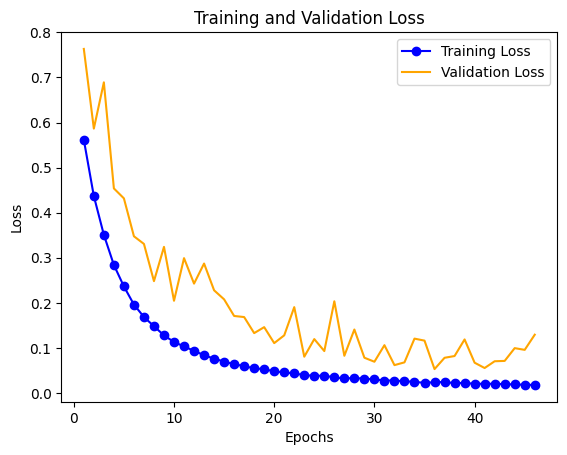

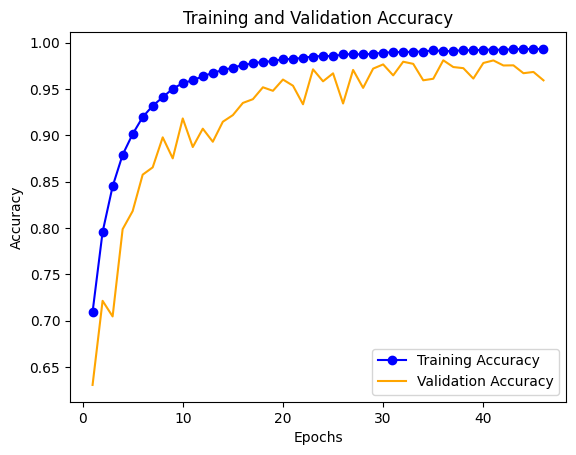

In [43]:
plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

In [44]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

# Get model predictions
y_pred = model.predict(test_ds)
y_pred = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to binary labels and flatten if necessary

# Extract true labels from the dataset
y_test = np.concatenate([y.numpy() for _, y in test_ds], axis=0)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Real', 'Fake']))

20000/20000 [==============================] - 77s 4ms/step
Accuracy: 0.98305
              precision    recall  f1-score   support

        Real       0.97      1.00      0.98     10000
        Fake       1.00      0.97      0.98     10000

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000



In [46]:
import os

# Assuming base_path and the train folder are defined as before:
train_dir = os.path.join(base_path, 'train')

# Get a list of subdirectories (class names) from the train directory.
# This should be in the same order as tf.keras.utils.image_dataset_from_directory() returns.
class_names = sorted(next(os.walk(train_dir))[1])
print("Class names:", class_names)

Class names: ['fake', 'real']


C:\Users\aashi\AppData\Local\Temp\ipykernel_6672\2735013323.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_val = int(label.numpy()[0])  # Convert label tensor to int (0 or 1)


2/2 [==============================] - 1s 127ms/step


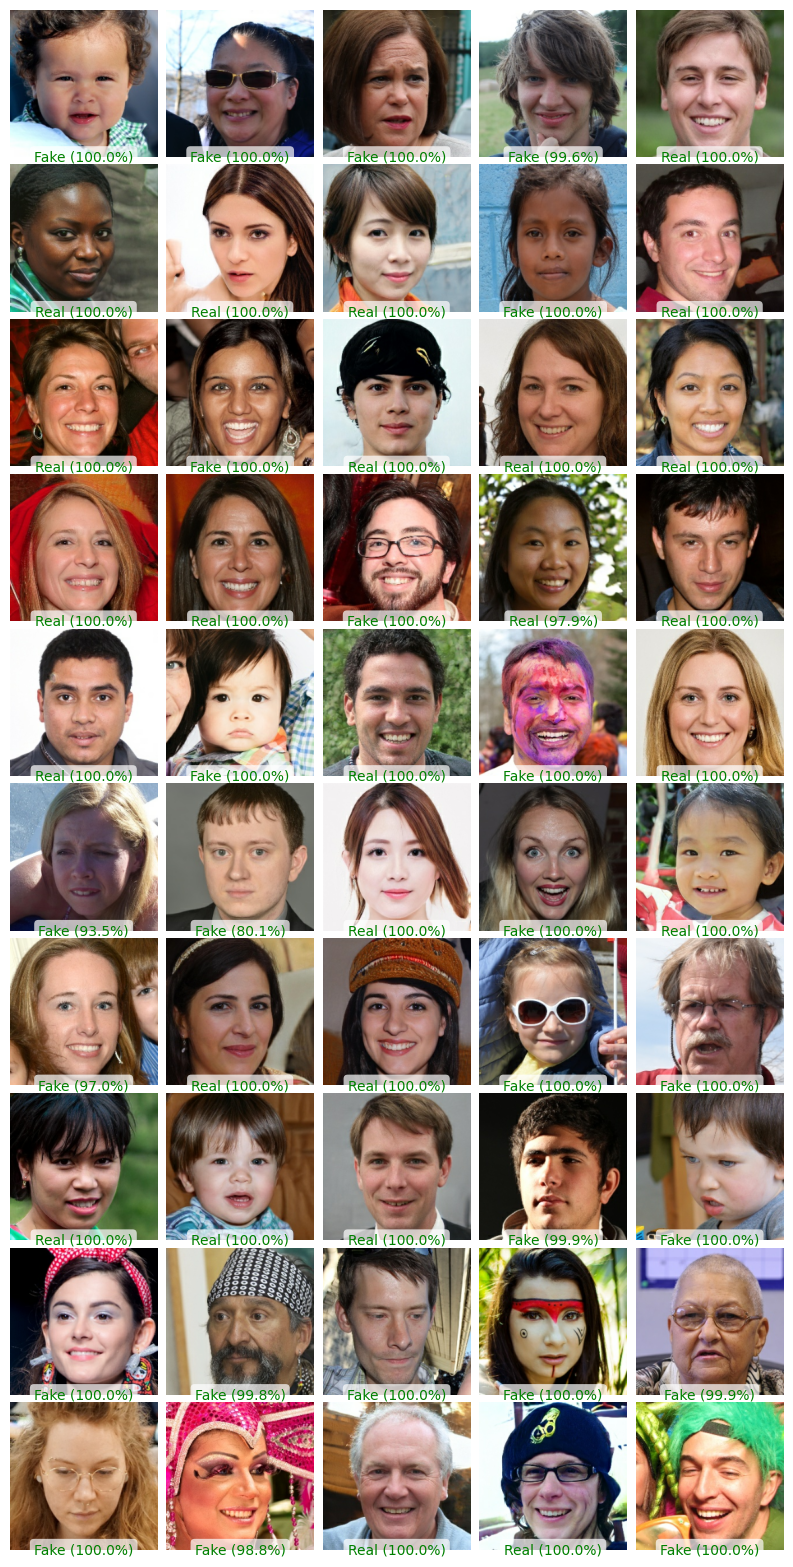

In [49]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Lists to store images and labels
real_images, fake_images = [], []

# Collect all real and fake images first
for image, label in test_ds:
    label_val = int(label.numpy()[0])  # Convert label tensor to int (0 or 1)
    
    if label_val == 0:
        real_images.append(image.numpy()[0])
    else:
        fake_images.append(image.numpy()[0])

# Ensure we have enough images
num_real, num_fake = len(real_images), len(fake_images)
assert num_real >= 25 and num_fake >= 25, "Not enough images in dataset!"

# Randomly select 25 images from each class
real_indices = np.random.choice(num_real, 25, replace=False)
fake_indices = np.random.choice(num_fake, 25, replace=False)

# Extract selected images and labels
selected_real_images = [real_images[i] for i in real_indices]
selected_fake_images = [fake_images[i] for i in fake_indices]
selected_real_labels = [0] * 25  # All real images are class 0
selected_fake_labels = [1] * 25  # All fake images are class 1

# Combine real and fake images
test_images = np.array(selected_real_images + selected_fake_images)
test_labels = np.array(selected_real_labels + selected_fake_labels)

# Shuffle images and labels together
indices = np.random.permutation(len(test_images))
test_images, test_labels = test_images[indices], test_labels[indices]

# Get model predictions
predictions = model.predict(test_images)

# Convert sigmoid outputs to binary class (0 or 1)
predicted_classes = (predictions > 0.5).astype("int32").flatten()

# Compute confidence scores
confidence_scores = np.maximum(predictions.flatten(), 1 - predictions.flatten())

# Class names
class_names = ['Real', 'Fake']

# Plot images with predictions
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(10, 20))  # Adjust figure size
fig.subplots_adjust(wspace=0.05, hspace=0.05)  # Reduce whitespace

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i])  
    ax.axis("off")

    # Get actual and predicted class labels
    actual_label = class_names[int(test_labels[i])]
    predicted_label = class_names[predicted_classes[i]]
    confidence = confidence_scores[i] * 100  

    # Choose color for text
    color = "green" if actual_label == predicted_label else "red"

    # Add text above the image with a background
    ax.text(
        0.5, -0.05,  # Position slightly above the image
        f"{predicted_label} ({confidence:.1f}%)",
        fontsize=10, 
        color=color, 
        ha="center", va="bottom",
        transform=ax.transAxes, 
        bbox=dict(facecolor="white", alpha=0.7, edgecolor="none", boxstyle="round,pad=0.3")
    )

plt.show()